In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in haxby_db.all() if 'rest' not in b.task],
                                                  mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100)

05/31/2020 11:32:26 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:27 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:28 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:29 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:29 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub1_run0

05/31/2020 11:32:53 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run02_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:54 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run03_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:54 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run04_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:55 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run05_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 11:32:56 Loading Nifti image /home/zulqarnain/fmri_data/Haxby_Final/sub4_run0

In [7]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/31/2020 11:33:37 [Epoch 1] (4279ms) Posterior free-energy 1.41720760e+10
05/31/2020 11:33:37 Saving checkpoint...
05/31/2020 11:33:41 [Epoch 2] (3752ms) Posterior free-energy 1.35725414e+10
05/31/2020 11:33:44 [Epoch 3] (3745ms) Posterior free-energy 1.30560676e+10
05/31/2020 11:33:48 [Epoch 4] (3738ms) Posterior free-energy 1.23171840e+10
05/31/2020 11:33:52 [Epoch 5] (3747ms) Posterior free-energy 1.19513682e+10
05/31/2020 11:33:55 [Epoch 6] (3738ms) Posterior free-energy 1.15025152e+10
05/31/2020 11:33:59 [Epoch 7] (3745ms) Posterior free-energy 1.12128717e+10
05/31/2020 11:34:03 [Epoch 8] (3754ms) Posterior free-energy 1.08986522e+10
05/31/2020 11:34:07 [Epoch 9] (3740ms) Posterior free-energy 1.06552801e+10
05/31/2020 11:34:10 [Epoch 10] (3755ms) Posterior free-energy 1.04567726e+10
05/31/2020 11:34:14 [Epoch 11] (3746ms) Posterior free-energy 1.01896458e+10
05/31/2020 11:34:18 [Epoch 12] (3742ms) Posterior free-energy 1.00506583e+10
05/31/2020 11:34:22 [Epoch 13] (3748ms) Post

05/31/2020 11:40:30 [Epoch 106] (3921ms) Posterior free-energy 7.26299648e+09
05/31/2020 11:40:34 [Epoch 107] (3916ms) Posterior free-energy 7.25805926e+09
05/31/2020 11:40:37 [Epoch 108] (3906ms) Posterior free-energy 7.24730214e+09
05/31/2020 11:40:41 [Epoch 109] (3920ms) Posterior free-energy 7.23870515e+09
05/31/2020 11:40:45 [Epoch 110] (3927ms) Posterior free-energy 7.23337728e+09
05/31/2020 11:40:49 [Epoch 111] (3918ms) Posterior free-energy 7.22252339e+09
05/31/2020 11:40:53 [Epoch 112] (3912ms) Posterior free-energy 7.21176115e+09
05/31/2020 11:40:57 [Epoch 113] (3925ms) Posterior free-energy 7.20963942e+09
05/31/2020 11:41:01 [Epoch 114] (3931ms) Posterior free-energy 7.19691418e+09
05/31/2020 11:41:05 [Epoch 115] (3922ms) Posterior free-energy 7.18454733e+09
05/31/2020 11:41:09 [Epoch 116] (3912ms) Posterior free-energy 7.17794150e+09
05/31/2020 11:41:13 [Epoch 117] (3933ms) Posterior free-energy 7.16370944e+09
05/31/2020 11:41:17 [Epoch 118] (3938ms) Posterior free-energy 7

05/31/2020 11:47:24 [Epoch 210] (4003ms) Posterior free-energy 6.68221594e+09
05/31/2020 11:47:28 [Epoch 211] (3993ms) Posterior free-energy 6.67642061e+09
05/31/2020 11:47:32 [Epoch 212] (3985ms) Posterior free-energy 6.67474022e+09
05/31/2020 11:47:36 [Epoch 213] (3994ms) Posterior free-energy 6.67710771e+09
05/31/2020 11:47:40 [Epoch 214] (4006ms) Posterior free-energy 6.66878669e+09
05/31/2020 11:47:44 [Epoch 215] (3998ms) Posterior free-energy 6.66536960e+09
05/31/2020 11:47:48 [Epoch 216] (3988ms) Posterior free-energy 6.66137907e+09
05/31/2020 11:47:52 [Epoch 217] (4001ms) Posterior free-energy 6.66153421e+09
05/31/2020 11:47:56 [Epoch 218] (4011ms) Posterior free-energy 6.65600870e+09
05/31/2020 11:48:00 [Epoch 219] (4001ms) Posterior free-energy 6.65441024e+09
05/31/2020 11:48:04 [Epoch 220] (3990ms) Posterior free-energy 6.64937165e+09
05/31/2020 11:48:08 [Epoch 221] (4003ms) Posterior free-energy 6.64449536e+09
05/31/2020 11:48:12 [Epoch 222] (4010ms) Posterior free-energy 6

05/31/2020 11:54:26 [Epoch 314] (4281ms) Posterior free-energy 6.42413261e+09
05/31/2020 11:54:30 [Epoch 315] (4275ms) Posterior free-energy 6.42659482e+09
05/31/2020 11:54:35 [Epoch 316] (4262ms) Posterior free-energy 6.42171392e+09
05/31/2020 11:54:39 [Epoch 317] (4140ms) Posterior free-energy 6.41976269e+09
05/31/2020 11:54:43 [Epoch 318] (4098ms) Posterior free-energy 6.41613926e+09
05/31/2020 11:54:47 [Epoch 319] (4083ms) Posterior free-energy 6.41911194e+09
05/31/2020 11:54:51 [Epoch 320] (4070ms) Posterior free-energy 6.41390336e+09
05/31/2020 11:54:55 [Epoch 321] (4082ms) Posterior free-energy 6.41068032e+09
05/31/2020 11:54:59 [Epoch 322] (4098ms) Posterior free-energy 6.41026714e+09
05/31/2020 11:55:03 [Epoch 323] (4086ms) Posterior free-energy 6.40871424e+09
05/31/2020 11:55:07 [Epoch 324] (4088ms) Posterior free-energy 6.40388403e+09
05/31/2020 11:55:11 [Epoch 325] (4113ms) Posterior free-energy 6.40597555e+09
05/31/2020 11:55:16 [Epoch 326] (4126ms) Posterior free-energy 6

05/31/2020 12:01:48 [Epoch 418] (4166ms) Posterior free-energy 6.27806003e+09
05/31/2020 12:01:52 [Epoch 419] (4152ms) Posterior free-energy 6.27858330e+09
05/31/2020 12:01:57 [Epoch 420] (4137ms) Posterior free-energy 6.27544525e+09
05/31/2020 12:02:01 [Epoch 421] (4152ms) Posterior free-energy 6.27503206e+09
05/31/2020 12:02:05 [Epoch 422] (4161ms) Posterior free-energy 6.27376333e+09
05/31/2020 12:02:09 [Epoch 423] (4151ms) Posterior free-energy 6.27189402e+09
05/31/2020 12:02:13 [Epoch 424] (4143ms) Posterior free-energy 6.27250278e+09
05/31/2020 12:02:17 [Epoch 425] (4159ms) Posterior free-energy 6.26950246e+09
05/31/2020 12:02:22 [Epoch 426] (4162ms) Posterior free-energy 6.26750003e+09
05/31/2020 12:02:26 [Epoch 427] (4200ms) Posterior free-energy 6.26566912e+09
05/31/2020 12:02:30 [Epoch 428] (4142ms) Posterior free-energy 6.26462566e+09
05/31/2020 12:02:34 [Epoch 429] (4158ms) Posterior free-energy 6.26354842e+09
05/31/2020 12:02:38 [Epoch 430] (4164ms) Posterior free-energy 6

05/31/2020 12:09:06 [Epoch 522] (4230ms) Posterior free-energy 6.17929318e+09
05/31/2020 12:09:10 [Epoch 523] (4224ms) Posterior free-energy 6.18025216e+09
05/31/2020 12:09:14 [Epoch 524] (4219ms) Posterior free-energy 6.17893837e+09
05/31/2020 12:09:19 [Epoch 525] (4227ms) Posterior free-energy 6.17894554e+09
05/31/2020 12:09:23 [Epoch 526] (4229ms) Posterior free-energy 6.17754573e+09
05/31/2020 12:09:27 [Epoch 527] (4170ms) Posterior free-energy 6.17701990e+09
05/31/2020 12:09:31 [Epoch 528] (4151ms) Posterior free-energy 6.17523866e+09
05/31/2020 12:09:35 [Epoch 529] (4168ms) Posterior free-energy 6.17802906e+09
05/31/2020 12:09:39 [Epoch 530] (4171ms) Posterior free-energy 6.17543731e+09
05/31/2020 12:09:44 [Epoch 531] (4159ms) Posterior free-energy 6.17449318e+09
05/31/2020 12:09:48 [Epoch 532] (4150ms) Posterior free-energy 6.17275085e+09
05/31/2020 12:09:52 [Epoch 533] (4161ms) Posterior free-energy 6.17064192e+09
05/31/2020 12:09:56 [Epoch 534] (4172ms) Posterior free-energy 6

05/31/2020 12:16:21 [Epoch 626] (4174ms) Posterior free-energy 6.11148954e+09
05/31/2020 12:16:25 [Epoch 627] (4166ms) Posterior free-energy 6.11098419e+09
05/31/2020 12:16:29 [Epoch 628] (4159ms) Posterior free-energy 6.11018598e+09
05/31/2020 12:16:34 [Epoch 629] (4165ms) Posterior free-energy 6.11095040e+09
05/31/2020 12:16:38 [Epoch 630] (4174ms) Posterior free-energy 6.10903194e+09
05/31/2020 12:16:42 [Epoch 631] (4164ms) Posterior free-energy 6.10775347e+09
05/31/2020 12:16:46 [Epoch 632] (4159ms) Posterior free-energy 6.10788710e+09
05/31/2020 12:16:50 [Epoch 633] (4163ms) Posterior free-energy 6.10793677e+09
05/31/2020 12:16:54 [Epoch 634] (4177ms) Posterior free-energy 6.10703155e+09
05/31/2020 12:16:59 [Epoch 635] (4172ms) Posterior free-energy 6.10632090e+09
05/31/2020 12:17:03 [Epoch 636] (4234ms) Posterior free-energy 6.10655232e+09
05/31/2020 12:17:07 [Epoch 637] (4330ms) Posterior free-energy 6.10736589e+09
05/31/2020 12:17:11 [Epoch 638] (4178ms) Posterior free-energy 6

05/31/2020 12:23:40 [Epoch 730] (4312ms) Posterior free-energy 6.05882010e+09
05/31/2020 12:23:44 [Epoch 731] (4302ms) Posterior free-energy 6.05861171e+09
05/31/2020 12:23:49 [Epoch 732] (4294ms) Posterior free-energy 6.05865011e+09
05/31/2020 12:23:53 [Epoch 733] (4301ms) Posterior free-energy 6.05783501e+09
05/31/2020 12:23:57 [Epoch 734] (4318ms) Posterior free-energy 6.05811354e+09
05/31/2020 12:24:02 [Epoch 735] (4320ms) Posterior free-energy 6.05795789e+09
05/31/2020 12:24:06 [Epoch 736] (4306ms) Posterior free-energy 6.05631693e+09
05/31/2020 12:24:10 [Epoch 737] (4304ms) Posterior free-energy 6.05756160e+09
05/31/2020 12:24:14 [Epoch 738] (4249ms) Posterior free-energy 6.05599386e+09
05/31/2020 12:24:19 [Epoch 739] (4079ms) Posterior free-energy 6.05605222e+09
05/31/2020 12:24:23 [Epoch 740] (4072ms) Posterior free-energy 6.05411584e+09
05/31/2020 12:24:27 [Epoch 741] (4088ms) Posterior free-energy 6.05625242e+09
05/31/2020 12:24:31 [Epoch 742] (4098ms) Posterior free-energy 6

05/31/2020 12:30:53 [Epoch 834] (4113ms) Posterior free-energy 6.01819546e+09
05/31/2020 12:30:57 [Epoch 835] (4109ms) Posterior free-energy 6.01812480e+09
05/31/2020 12:31:01 [Epoch 836] (4104ms) Posterior free-energy 6.01925581e+09
05/31/2020 12:31:05 [Epoch 837] (4111ms) Posterior free-energy 6.01710029e+09
05/31/2020 12:31:09 [Epoch 838] (4120ms) Posterior free-energy 6.01513267e+09
05/31/2020 12:31:13 [Epoch 839] (4114ms) Posterior free-energy 6.01823539e+09
05/31/2020 12:31:18 [Epoch 840] (4105ms) Posterior free-energy 6.01695437e+09
05/31/2020 12:31:22 [Epoch 841] (4117ms) Posterior free-energy 6.01646643e+09
05/31/2020 12:31:26 [Epoch 842] (4127ms) Posterior free-energy 6.01834291e+09
05/31/2020 12:31:30 [Epoch 843] (4116ms) Posterior free-energy 6.01648486e+09
05/31/2020 12:31:34 [Epoch 844] (4106ms) Posterior free-energy 6.01383322e+09
05/31/2020 12:31:38 [Epoch 845] (4127ms) Posterior free-energy 6.01440000e+09
05/31/2020 12:31:42 [Epoch 846] (4129ms) Posterior free-energy 6

05/31/2020 12:38:10 [Epoch 938] (4180ms) Posterior free-energy 5.98580070e+09
05/31/2020 12:38:15 [Epoch 939] (4415ms) Posterior free-energy 5.98511616e+09
05/31/2020 12:38:19 [Epoch 940] (4391ms) Posterior free-energy 5.98422477e+09
05/31/2020 12:38:24 [Epoch 941] (4406ms) Posterior free-energy 5.98540390e+09
05/31/2020 12:38:28 [Epoch 942] (4405ms) Posterior free-energy 5.98475366e+09
05/31/2020 12:38:32 [Epoch 943] (4265ms) Posterior free-energy 5.98479053e+09
05/31/2020 12:38:37 [Epoch 944] (4158ms) Posterior free-energy 5.98449971e+09
05/31/2020 12:38:41 [Epoch 945] (4171ms) Posterior free-energy 5.98281626e+09
05/31/2020 12:38:45 [Epoch 946] (4178ms) Posterior free-energy 5.98310042e+09
05/31/2020 12:38:49 [Epoch 947] (4163ms) Posterior free-energy 5.98379264e+09
05/31/2020 12:38:53 [Epoch 948] (4149ms) Posterior free-energy 5.98261862e+09
05/31/2020 12:38:57 [Epoch 949] (4162ms) Posterior free-energy 5.98208819e+09
05/31/2020 12:39:02 [Epoch 950] (4166ms) Posterior free-energy 5

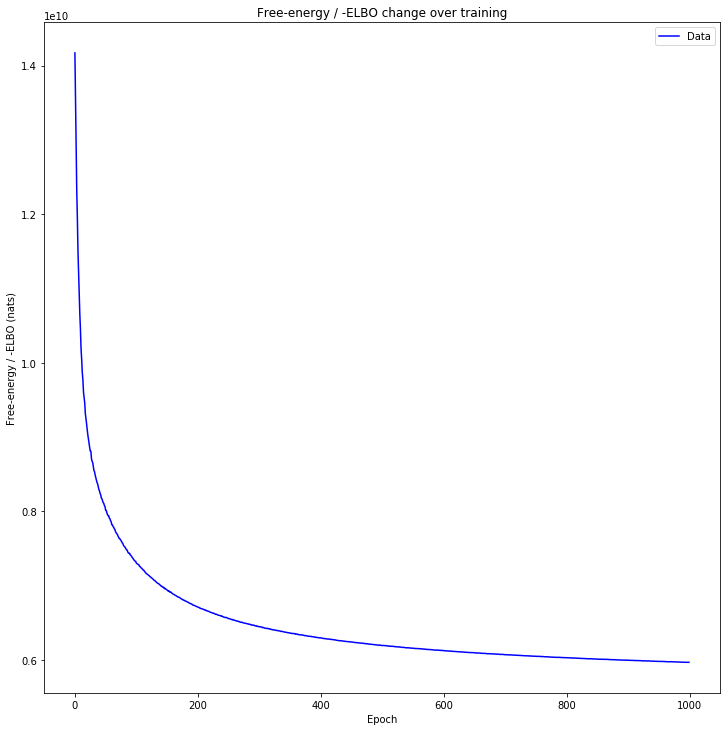

In [8]:
utils.plot_losses(losses)

In [9]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=haxby_db.inference_filter(training=False))

05/31/2020 12:42:31 [Epoch 1] (470ms) Posterior free-energy 1.64003341e+09
05/31/2020 12:42:31 Saving checkpoint...
05/31/2020 12:42:31 [Epoch 2] (479ms) Posterior free-energy 1.62180634e+09
05/31/2020 12:42:32 [Epoch 3] (488ms) Posterior free-energy 1.61719654e+09
05/31/2020 12:42:32 [Epoch 4] (485ms) Posterior free-energy 1.56173773e+09
05/31/2020 12:42:33 [Epoch 5] (487ms) Posterior free-energy 1.55807718e+09
05/31/2020 12:42:33 [Epoch 6] (483ms) Posterior free-energy 1.48329587e+09
05/31/2020 12:42:34 [Epoch 7] (472ms) Posterior free-energy 1.47583718e+09
05/31/2020 12:42:34 [Epoch 8] (474ms) Posterior free-energy 1.46827059e+09
05/31/2020 12:42:34 [Epoch 9] (474ms) Posterior free-energy 1.44141530e+09
05/31/2020 12:42:35 [Epoch 10] (476ms) Posterior free-energy 1.40872166e+09
05/31/2020 12:42:35 [Epoch 11] (483ms) Posterior free-energy 1.37029056e+09
05/31/2020 12:42:36 [Epoch 12] (469ms) Posterior free-energy 1.36761114e+09
05/31/2020 12:42:36 [Epoch 13] (471ms) Posterior free-en

05/31/2020 12:43:22 [Epoch 108] (476ms) Posterior free-energy 9.63662848e+08
05/31/2020 12:43:22 [Epoch 109] (484ms) Posterior free-energy 9.60096064e+08
05/31/2020 12:43:23 [Epoch 110] (471ms) Posterior free-energy 9.55388672e+08
05/31/2020 12:43:23 [Epoch 111] (470ms) Posterior free-energy 9.58153344e+08
05/31/2020 12:43:24 [Epoch 112] (468ms) Posterior free-energy 9.59135744e+08
05/31/2020 12:43:24 [Epoch 113] (471ms) Posterior free-energy 9.55065344e+08
05/31/2020 12:43:25 [Epoch 114] (480ms) Posterior free-energy 9.56390912e+08
05/31/2020 12:43:25 [Epoch 115] (481ms) Posterior free-energy 9.56080000e+08
05/31/2020 12:43:26 [Epoch 116] (470ms) Posterior free-energy 9.53083520e+08
05/31/2020 12:43:26 [Epoch 117] (472ms) Posterior free-energy 9.54930368e+08
05/31/2020 12:43:26 [Epoch 118] (471ms) Posterior free-energy 9.51948096e+08
05/31/2020 12:43:27 [Epoch 119] (474ms) Posterior free-energy 9.49615360e+08
05/31/2020 12:43:27 [Epoch 120] (480ms) Posterior free-energy 9.48345216e+08

05/31/2020 12:44:12 [Epoch 214] (481ms) Posterior free-energy 8.69295104e+08
05/31/2020 12:44:13 [Epoch 215] (483ms) Posterior free-energy 8.70454528e+08
05/31/2020 12:44:13 [Epoch 216] (477ms) Posterior free-energy 8.68430208e+08
05/31/2020 12:44:14 [Epoch 217] (473ms) Posterior free-energy 8.65879232e+08
05/31/2020 12:44:14 [Epoch 218] (472ms) Posterior free-energy 8.67968448e+08
05/31/2020 12:44:15 [Epoch 219] (475ms) Posterior free-energy 8.67442816e+08
05/31/2020 12:44:15 [Epoch 220] (471ms) Posterior free-energy 8.69173248e+08
05/31/2020 12:44:16 [Epoch 221] (471ms) Posterior free-energy 8.67437120e+08
05/31/2020 12:44:16 [Epoch 222] (468ms) Posterior free-energy 8.64287296e+08
05/31/2020 12:44:17 [Epoch 223] (472ms) Posterior free-energy 8.63488320e+08
05/31/2020 12:44:17 [Epoch 224] (480ms) Posterior free-energy 8.63819392e+08
05/31/2020 12:44:18 [Epoch 225] (480ms) Posterior free-energy 8.63775488e+08
05/31/2020 12:44:18 [Epoch 226] (472ms) Posterior free-energy 8.64210368e+08

05/31/2020 12:45:03 [Epoch 320] (474ms) Posterior free-energy 8.18469824e+08
05/31/2020 12:45:04 [Epoch 321] (475ms) Posterior free-energy 8.16865024e+08
05/31/2020 12:45:04 [Epoch 322] (481ms) Posterior free-energy 8.17508608e+08
05/31/2020 12:45:04 [Epoch 323] (470ms) Posterior free-energy 8.16328768e+08
05/31/2020 12:45:05 [Epoch 324] (481ms) Posterior free-energy 8.16365440e+08
05/31/2020 12:45:05 [Epoch 325] (483ms) Posterior free-energy 8.17561216e+08
05/31/2020 12:45:06 [Epoch 326] (476ms) Posterior free-energy 8.17205504e+08
05/31/2020 12:45:06 [Epoch 327] (475ms) Posterior free-energy 8.15890304e+08
05/31/2020 12:45:07 [Epoch 328] (478ms) Posterior free-energy 8.14485312e+08
05/31/2020 12:45:07 [Epoch 329] (485ms) Posterior free-energy 8.15815744e+08
05/31/2020 12:45:08 [Epoch 330] (471ms) Posterior free-energy 8.15336896e+08
05/31/2020 12:45:08 [Epoch 331] (470ms) Posterior free-energy 8.12402880e+08
05/31/2020 12:45:09 [Epoch 332] (467ms) Posterior free-energy 8.14918336e+08

05/31/2020 12:45:54 [Epoch 426] (477ms) Posterior free-energy 7.85189504e+08
05/31/2020 12:45:54 [Epoch 427] (485ms) Posterior free-energy 7.85342464e+08
05/31/2020 12:45:55 [Epoch 428] (485ms) Posterior free-energy 7.84744384e+08
05/31/2020 12:45:55 [Epoch 429] (486ms) Posterior free-energy 7.83391872e+08
05/31/2020 12:45:56 [Epoch 430] (483ms) Posterior free-energy 7.83728256e+08
05/31/2020 12:45:56 [Epoch 431] (488ms) Posterior free-energy 7.84162944e+08
05/31/2020 12:45:57 [Epoch 432] (481ms) Posterior free-energy 7.83789440e+08
05/31/2020 12:45:57 [Epoch 433] (481ms) Posterior free-energy 7.83590720e+08
05/31/2020 12:45:58 [Epoch 434] (490ms) Posterior free-energy 7.83239680e+08
05/31/2020 12:45:58 [Epoch 435] (494ms) Posterior free-energy 7.83489664e+08
05/31/2020 12:45:59 [Epoch 436] (486ms) Posterior free-energy 7.82725312e+08
05/31/2020 12:45:59 [Epoch 437] (483ms) Posterior free-energy 7.82628480e+08
05/31/2020 12:46:00 [Epoch 438] (480ms) Posterior free-energy 7.83560832e+08

05/31/2020 12:46:45 [Epoch 532] (492ms) Posterior free-energy 7.63630720e+08
05/31/2020 12:46:46 [Epoch 533] (490ms) Posterior free-energy 7.64102784e+08
05/31/2020 12:46:46 [Epoch 534] (481ms) Posterior free-energy 7.63696960e+08
05/31/2020 12:46:47 [Epoch 535] (482ms) Posterior free-energy 7.64148736e+08
05/31/2020 12:46:47 [Epoch 536] (481ms) Posterior free-energy 7.63306304e+08
05/31/2020 12:46:48 [Epoch 537] (485ms) Posterior free-energy 7.63007360e+08
05/31/2020 12:46:48 [Epoch 538] (489ms) Posterior free-energy 7.62431616e+08
05/31/2020 12:46:49 [Epoch 539] (487ms) Posterior free-energy 7.62756544e+08
05/31/2020 12:46:49 [Epoch 540] (488ms) Posterior free-energy 7.62830016e+08
05/31/2020 12:46:50 [Epoch 541] (492ms) Posterior free-energy 7.62389504e+08
05/31/2020 12:46:50 [Epoch 542] (483ms) Posterior free-energy 7.61167936e+08
05/31/2020 12:46:51 [Epoch 543] (482ms) Posterior free-energy 7.62440640e+08
05/31/2020 12:46:51 [Epoch 544] (496ms) Posterior free-energy 7.61006912e+08

05/31/2020 12:47:36 [Epoch 638] (472ms) Posterior free-energy 7.47646016e+08
05/31/2020 12:47:37 [Epoch 639] (471ms) Posterior free-energy 7.48040064e+08
05/31/2020 12:47:37 [Epoch 640] (468ms) Posterior free-energy 7.49132032e+08
05/31/2020 12:47:38 [Epoch 641] (472ms) Posterior free-energy 7.48032576e+08
05/31/2020 12:47:38 [Epoch 642] (480ms) Posterior free-energy 7.47854848e+08
05/31/2020 12:47:39 [Epoch 643] (481ms) Posterior free-energy 7.46955008e+08
05/31/2020 12:47:39 [Epoch 644] (470ms) Posterior free-energy 7.47176512e+08
05/31/2020 12:47:40 [Epoch 645] (472ms) Posterior free-energy 7.47132032e+08
05/31/2020 12:47:40 [Epoch 646] (472ms) Posterior free-energy 7.47848128e+08
05/31/2020 12:47:41 [Epoch 647] (478ms) Posterior free-energy 7.46523712e+08
05/31/2020 12:47:41 [Epoch 648] (485ms) Posterior free-energy 7.46655296e+08
05/31/2020 12:47:42 [Epoch 649] (475ms) Posterior free-energy 7.46259456e+08
05/31/2020 12:47:42 [Epoch 650] (472ms) Posterior free-energy 7.45815040e+08

05/31/2020 12:48:27 [Epoch 744] (485ms) Posterior free-energy 7.36927232e+08
05/31/2020 12:48:27 [Epoch 745] (474ms) Posterior free-energy 7.35955904e+08
05/31/2020 12:48:28 [Epoch 746] (472ms) Posterior free-energy 7.37037184e+08
05/31/2020 12:48:28 [Epoch 747] (475ms) Posterior free-energy 7.36607488e+08
05/31/2020 12:48:29 [Epoch 748] (471ms) Posterior free-energy 7.35923456e+08
05/31/2020 12:48:29 [Epoch 749] (472ms) Posterior free-energy 7.35410432e+08
05/31/2020 12:48:30 [Epoch 750] (477ms) Posterior free-energy 7.36138752e+08
05/31/2020 12:48:30 [Epoch 751] (471ms) Posterior free-energy 7.35937856e+08
05/31/2020 12:48:30 Saving checkpoint...
05/31/2020 12:48:31 [Epoch 752] (479ms) Posterior free-energy 7.35666432e+08
05/31/2020 12:48:31 [Epoch 753] (480ms) Posterior free-energy 7.35538304e+08
05/31/2020 12:48:32 [Epoch 754] (471ms) Posterior free-energy 7.35187776e+08
05/31/2020 12:48:32 [Epoch 755] (472ms) Posterior free-energy 7.34912192e+08
05/31/2020 12:48:33 [Epoch 756] (47

05/31/2020 12:49:17 [Epoch 850] (473ms) Posterior free-energy 7.26589696e+08
05/31/2020 12:49:18 [Epoch 851] (473ms) Posterior free-energy 7.27297408e+08
05/31/2020 12:49:18 Saving checkpoint...
05/31/2020 12:49:18 [Epoch 852] (482ms) Posterior free-energy 7.27597568e+08
05/31/2020 12:49:19 [Epoch 853] (485ms) Posterior free-energy 7.27643136e+08
05/31/2020 12:49:19 [Epoch 854] (479ms) Posterior free-energy 7.26722944e+08
05/31/2020 12:49:20 [Epoch 855] (484ms) Posterior free-energy 7.27362432e+08
05/31/2020 12:49:20 [Epoch 856] (472ms) Posterior free-energy 7.26993280e+08
05/31/2020 12:49:21 [Epoch 857] (475ms) Posterior free-energy 7.26338560e+08
05/31/2020 12:49:21 [Epoch 858] (472ms) Posterior free-energy 7.27310080e+08
05/31/2020 12:49:22 [Epoch 859] (470ms) Posterior free-energy 7.26749504e+08
05/31/2020 12:49:22 [Epoch 860] (467ms) Posterior free-energy 7.27493632e+08
05/31/2020 12:49:23 [Epoch 861] (472ms) Posterior free-energy 7.26840256e+08
05/31/2020 12:49:23 [Epoch 862] (48

05/31/2020 12:50:08 [Epoch 955] (474ms) Posterior free-energy 7.20075136e+08
05/31/2020 12:50:08 [Epoch 956] (478ms) Posterior free-energy 7.19919488e+08
05/31/2020 12:50:09 [Epoch 957] (480ms) Posterior free-energy 7.20042496e+08
05/31/2020 12:50:09 [Epoch 958] (483ms) Posterior free-energy 7.19657472e+08
05/31/2020 12:50:10 [Epoch 959] (471ms) Posterior free-energy 7.19828160e+08
05/31/2020 12:50:10 [Epoch 960] (473ms) Posterior free-energy 7.19761216e+08
05/31/2020 12:50:10 [Epoch 961] (470ms) Posterior free-energy 7.20386752e+08
05/31/2020 12:50:11 [Epoch 962] (482ms) Posterior free-energy 7.20143680e+08
05/31/2020 12:50:11 [Epoch 963] (487ms) Posterior free-energy 7.20316160e+08
05/31/2020 12:50:12 [Epoch 964] (487ms) Posterior free-energy 7.20134464e+08
05/31/2020 12:50:12 [Epoch 965] (476ms) Posterior free-energy 7.19796672e+08
05/31/2020 12:50:13 [Epoch 966] (473ms) Posterior free-energy 7.19350336e+08
05/31/2020 12:50:13 [Epoch 967] (476ms) Posterior free-energy 7.19572672e+08

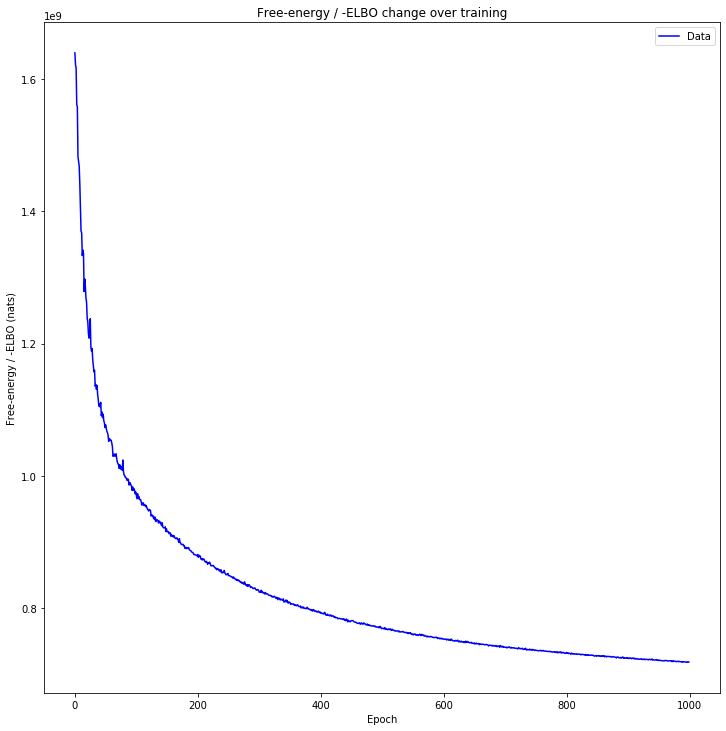

In [10]:
utils.plot_losses(losses)

In [11]:
import re

In [12]:
def subject_labeler(subject):
    return 'Participant %d' % (int(subject))

In [13]:
def task_labeler(task):
    return task

In [14]:
def subject_task_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

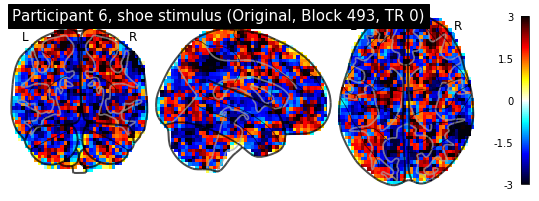

05/31/2020 12:50:31 Reconstruction Error (Frobenius Norm): 6.12985413e+02 out of 6.15114502e+02


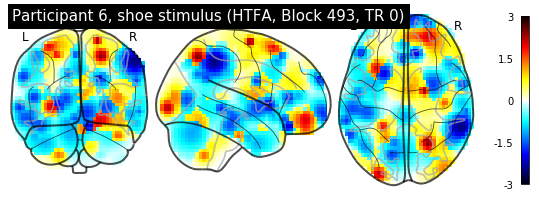

In [ ]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=subject_task_labeler)
    htfa.plot_reconstruction(b, labeler=subject_task_labeler)

In [ ]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='PCA')

In [ ]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='PCA')

In [ ]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='TSNE')

In [ ]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='TSNE')

In [ ]:
htfa.visualize_factor_template()

In [ ]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=haxby_db.inference_filter(training=True))